#  **Basic Libraries & Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel('/content/heart_disease.xlsx',header=0,sheet_name=1)

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


# **Basic EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [ ]:
df[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
764,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [ ]:
df.drop_duplicates(inplace=True)

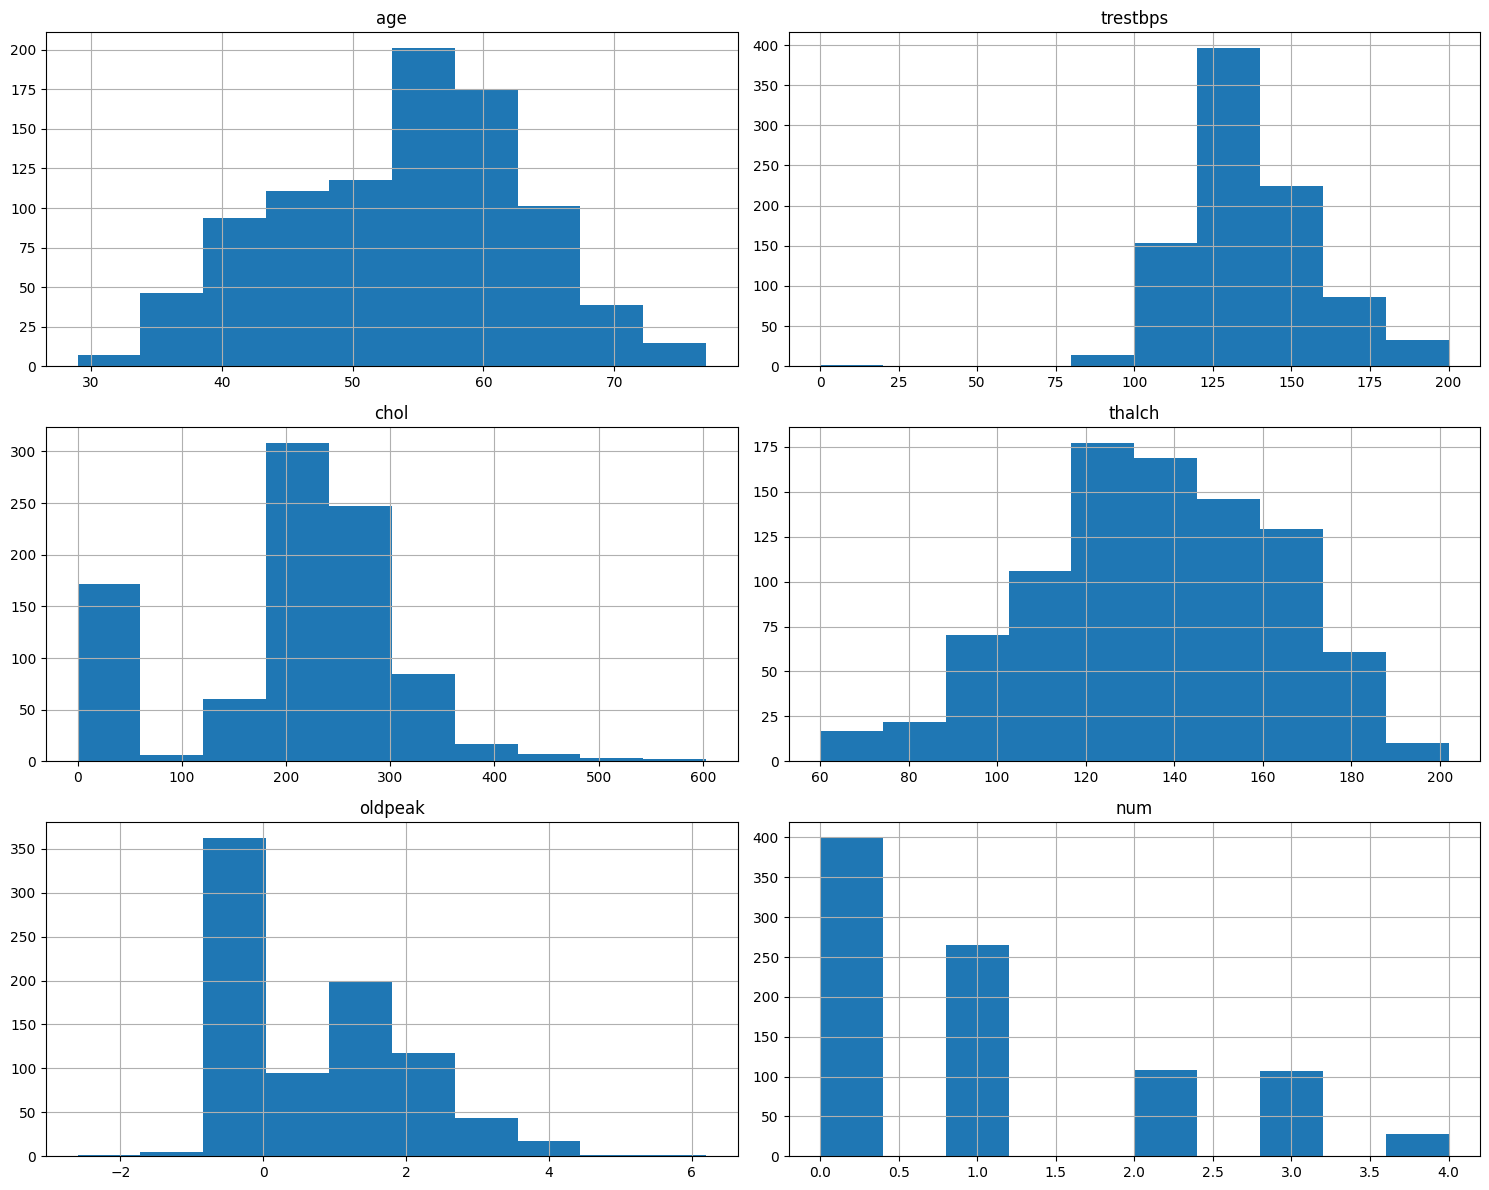

In [ ]:
df.hist(figsize=(15,12))
plt.tight_layout()

<Axes: >

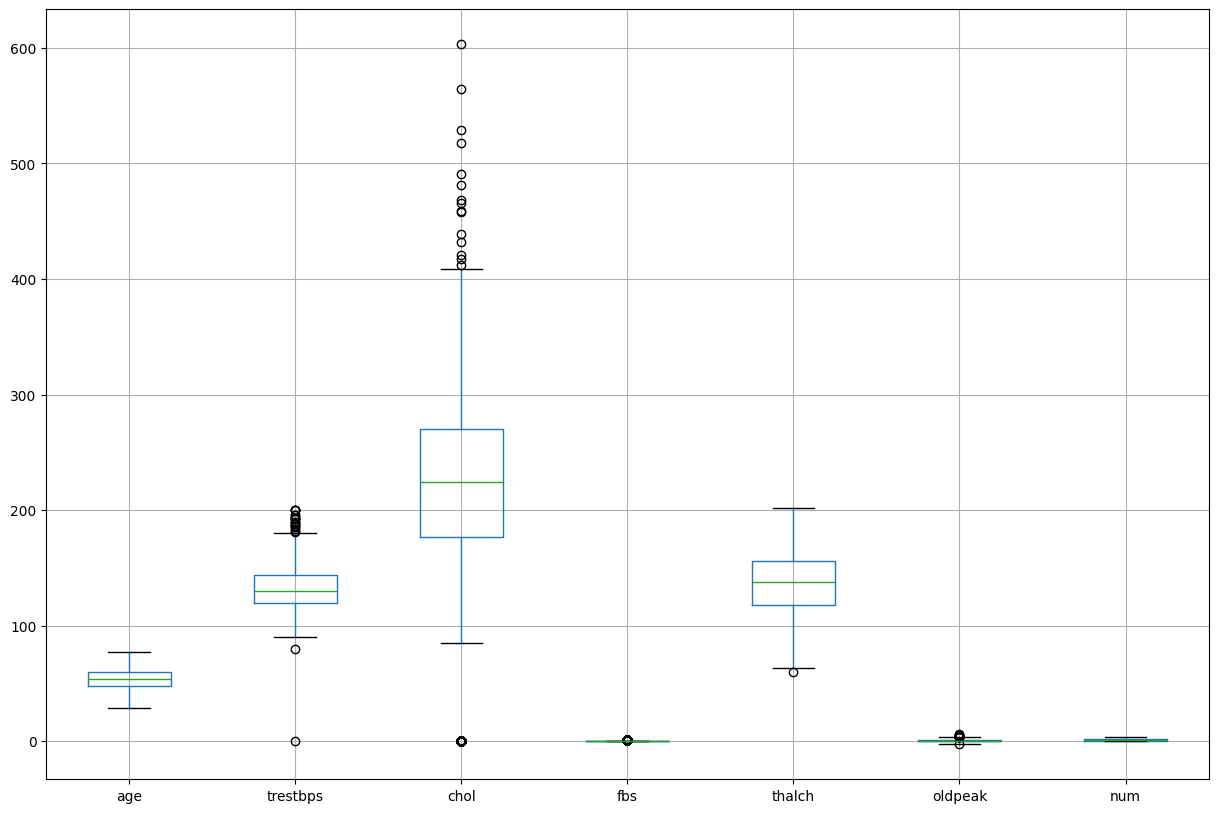

In [ ]:
df.boxplot(figsize=(15,10))

In [ ]:
df.corr(numeric_only=True)

,age,trestbps,chol,fbs,thalch,oldpeak,num
age,1.000000,0.253709,-0.100059,0.177004,-0.327868,0.243280,0.326227
trestbps,0.253709,1.000000,0.117392,0.112124,-0.132841,0.168160,0.136581
chol,-0.100059,0.117392,1.000000,-0.113651,0.198074,0.030052,-0.239065
fbs,0.177004,0.112124,-0.113651,1.000000,-0.065827,0.023915,0.156839
thalch,-0.327868,-0.132841,0.198074,-0.065827,1.000000,-0.140423,-0.322632
oldpeak,0.243280,0.168160,0.030052,0.023915,-0.140423,1.000000,0.438834
num,0.326227,0.136581,-0.239065,0.156839,-0.322632,0.438834,1.000000


<Axes: >

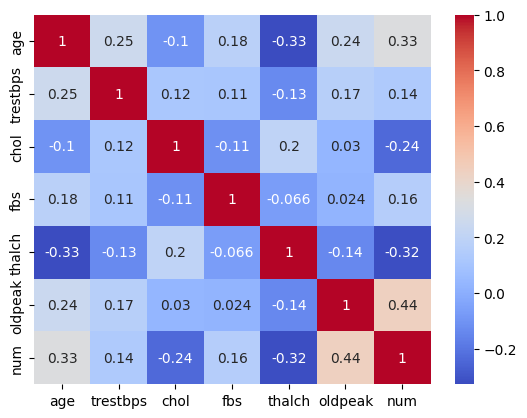

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

# **Feature Engineering**



 **Missing value Imputation**

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [ ]:
df['oldpeak']=df['oldpeak'].fillna(df['oldpeak'].median())

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


**Encoding Categorical Variavles**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df['sex']=le.fit_transform(df['sex'])
df['cp'] = le.fit_transform(df['cp'])
df['restecg'] = le.fit_transform(df['restecg'])
df['slope'] = le.fit_transform(df['slope'])
df['thal'] = le.fit_transform(df['thal'])

In [ ]:
 df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,False,2.3,0,0,0
1,41,1,1,135,203,0,1,132,False,0.0,1,0,0
2,57,1,0,140,192,0,1,148,False,0.4,1,0,0
3,52,1,3,118,186,0,0,190,False,0.0,1,0,0
4,57,1,0,110,201,0,1,126,True,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,False,1.5,2,0,4
904,62,1,0,166,170,0,2,120,True,3.0,1,0,4
905,56,1,2,170,0,0,0,123,True,2.5,0,0,4
906,56,1,2,144,208,1,2,105,TURE,0.5,0,0,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    int64  
 2   cp        907 non-null    int64  
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    int64  
 6   restecg   907 non-null    int64  
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    object 
 9   oldpeak   907 non-null    float64
 10  slope     907 non-null    int64  
 11  thal      907 non-null    int64  
 12  num       907 non-null    int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 99.2+ KB


In [ ]:
df['exang'] = (df['exang']).astype(object)

In [ ]:
df['exang'] = df['exang'].replace({True:1,'TURE':1,False:0,'FALSE':0})

<ipython-input-58-fe760dc8a821>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].replace({True:1,'TURE':1,False:0,'FALSE':0})


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.5,2,0,4
904,62,1,0,166,170,0,2,120,1,3.0,1,0,4
905,56,1,2,170,0,0,0,123,1,2.5,0,0,4
906,56,1,2,144,208,1,2,105,1,0.5,0,0,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    int64  
 2   cp        907 non-null    int64  
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    int64  
 6   restecg   907 non-null    int64  
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    int64  
 9   oldpeak   907 non-null    float64
 10  slope     907 non-null    int64  
 11  thal      907 non-null    int64  
 12  num       907 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 99.2 KB


**Scaling Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
df['age'] = scaler.fit_transform(df[['age']])
df['trestbps'] = scaler.fit_transform(df[['trestbps']])
df['chol'] = scaler.fit_transform(df[['chol']])
df['oldpeak'] = scaler.fit_transform(df[['oldpeak']])
df['thalch'] = scaler.fit_transform(df[['thalch']])
# scaled onlt original numeric variables.

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006097,1,3,0.568184,0.281318,1,0,0.523285,0,1.353255,0,0,0
1,-1.396447,1,1,0.077848,0.013691,0,1,-0.148399,0,-0.816467,1,0,0
2,0.350858,1,0,0.323016,-0.084439,0,1,0.448654,0,-0.439124,1,0,0
3,-0.195175,1,3,-0.755723,-0.137964,0,0,2.015918,0,-0.816467,1,0,0
4,0.350858,1,0,-1.147992,-0.004151,0,1,-0.372294,1,0.598569,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.085969,1,0,-0.412488,-1.797250,0,1,-0.596189,0,0.598569,2,0,4
904,0.896890,1,0,1.597890,-0.280698,0,2,-0.596189,1,2.013604,1,0,4
905,0.241651,1,2,1.794024,-1.797250,0,0,-0.484242,1,1.541926,0,0,4
906,0.241651,1,2,0.519151,0.058296,1,2,-1.155926,1,-0.344788,0,0,4


#  **Decision Tree Classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
x = df.drop(['num'],axis=1)

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,1.006097,1,3,0.568184,0.281318,1,0,0.523285,0,1.353255,0,0
1,-1.396447,1,1,0.077848,0.013691,0,1,-0.148399,0,-0.816467,1,0
2,0.350858,1,0,0.323016,-0.084439,0,1,0.448654,0,-0.439124,1,0
3,-0.195175,1,3,-0.755723,-0.137964,0,0,2.015918,0,-0.816467,1,0
4,0.350858,1,0,-1.147992,-0.004151,0,1,-0.372294,1,0.598569,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.085969,1,0,-0.412488,-1.797250,0,1,-0.596189,0,0.598569,2,0
904,0.896890,1,0,1.597890,-0.280698,0,2,-0.596189,1,2.013604,1,0
905,0.241651,1,2,1.794024,-1.797250,0,0,-0.484242,1,1.541926,0,0
906,0.241651,1,2,0.519151,0.058296,1,2,-1.155926,1,-0.344788,0,0


In [ ]:
y=df['num']

In [ ]:
y

,num
0,0
1,0
2,0
3,0
4,0
...,...
903,4
904,4
905,4
906,4


**Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(x_test)

**Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, clf.predict_proba(x_test), multi_class='ovr')

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.45604395604395603
Precision: 0.4499776914814508
Recall: 0.45604395604395603
F1-score: 0.44902679604020523
ROC-AUC: 0.5727536842121793


# **Hyperparameter Tuning**

In [ ]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']}

In [ ]:
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


In [ ]:
y_best_pred = best_model.predict(x_test)
print("Tuned Model Performance:")
print('accuracy:', accuracy_score(y_test, y_best_pred))
print('precision:', precision_score(y_test,y_best_pred, average='weighted'))
print('recall:',  recall_score(y_test, y_best_pred, average='weighted'))
print('f1:',f1_score(y_test, y_best_pred, average='weighted'))
print('roc_auc:' , roc_auc_score(y_test, clf.predict_proba(x_test), multi_class='ovr'))

Tuned Model Performance:
accuracy: 0.532967032967033
precision: 0.4727197802197803
recall: 0.532967032967033
f1: 0.49098145027503304
roc_auc: 0.5727536842121793


# **Tree Plot**

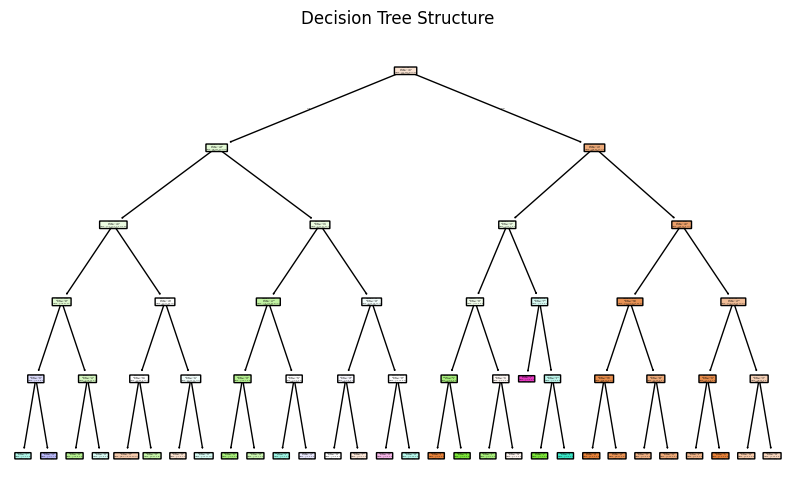

In [ ]:
plt.figure(figsize=(10, 6))
plot_tree(best_model, feature_names=x.columns, class_names=True, filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.show()

In [1]:
'''
1.
    max_depth : prevent overfitting if set appropriate.
    min_samples_split : reducing overfitting.
    min_sample_leaf : create minimum that number of leaves.
    max_feature :  reduces overfitting.
    criterionm : performance varies slightly.
    random_state : ensure reproductability.'''

'\n1.\n    max_depth : prevent overfitting if set appropriate.\n    min_samples_split : reducing overfitting.\n    min_sample_leaf : create minimum that number of leaves.\n    max_feature :  reduces overfitting.\n    criterionm : performance varies slightly.\n    random_state : ensure reproductability.'

In [3]:
'''
2.
    Label Encoding assigns integer to each category. It create in single column with integer.
    we can use it if we have ordinal data(where the order matters.)
    If we want to convert Y variable, then we have to use label encoder.
    eg. 0,1,2,3,4...


    One-hot encoding creates binary columns for each category. It creats multi binary columns.
    we can use it if we have nominal data(no order matters.)
    At any feature we can use one-hot encoding
    eg. only(0,1).'''


'\n2.\n    Label Encoding assigns integer to each category. It create in single column with integer.\n    we can use it if we have ordinal data(where the order matters.) \n    If we want to convert Y variable, then we have to use label encoder.\n    eg. 0,1,2,3,4...\n  \n\n    One-hot encoding creates binary columns for each category. It creats multi binary columns.\n    we can use it if we have nominal data(no order matters.)\n    At any feature we can use one-hot encoding\n    eg. only(0,1).'